In [1]:
# Install Essential Libraries
!pip install ultralytics
from IPython import display
#display.clear_output()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.8/898.8 kB 16.4 MB/s eta 0:00:00a 0:00:01


In [2]:
import wandb
# Import Essential Libraries
import os
import shutil
import random
import pandas as pd
from PIL import Image
import cv2
import yaml
from ultralytics import YOLO
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style='darkgrid')

import pathlib
import glob
import warnings
warnings.filterwarnings('ignore')

# ورود به Weights & Biases
wandb.login(key='fb34c333b00d4736d6be52fd6865d28800975566')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [3]:
# Load a pretrained YOLOv8n model from Ultralytics
Vio_Model = YOLO("yolov9e.pt")

100%|██████████| 112M/112M [00:00<00:00, 182MB/s]  


In [4]:
#### Train the model on our custom dataset
yaml_file_path = '/kaggle/input/helmet/data.yaml'
results = Vio_Model.train(
    data= yaml_file_path,     # Path to the dataset configuration file
    epochs=100,                # Number of epochs to train for
    #imgsz=640,               # Size of input images as integer
    #device= '1',             # Device to run on, i.e. cuda device=1,2,3,4
    #patience=20,             # Epochs to wait for no observable improvement for early stopping of training
    batch= -1,               # Number of images per batch
    optimizer='auto',        # Optimizer to use, choices=[SGD, Adam, Adamax, AdamW, NAdam, RAdam, RMSProp, auto]
                  # Random seed for reproducibility
    dropout=0.2,             # Use dropout regularization
)

Ultralytics 8.3.47 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov9e.pt, data=/kaggle/input/helmet/data.yaml, epochs=100, time=None, patience=100, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.2, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=

100%|██████████| 755k/755k [00:00<00:00, 16.1MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1         0  torch.nn.modules.linear.Identity             []                            
  1                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  2                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  3                  -1  1    252160  ultralytics.nn.modules.block.RepNCSPELAN4    [128, 256, 128, 64, 2]        
  4                  -1  1    164352  ultralytics.nn.modules.block.ADown           [256, 256]                    
  5                  -1  1   1004032  ultralytics.nn.modules.block.RepNCSPELAN4    [256, 512, 256, 128, 2]       
  6                  -1  1    656384  ultralytics.nn.modules.block.ADown           [512, 512]                    
  7                  -1  1   4006912  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 68.3MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/helmet/train/labels... 896 images, 0 backgrounds, 0 corrupt: 100%|██████████| 896/896 [00:04<00:00, 214.29it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/helmet/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (Tesla T4) 14.74G total, 0.50G reserved, 0.48G allocated, 13.76G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
    58147225       192.7         1.818           155         231.1        (1, 3, 640, 640)                    list
    58147225       385.4         2.967           112         140.6        (2, 3, 640, 640)                    list
    58147225       770.7         5.308         145.4         185.3        (4, 3, 640, 640)                    list
    58147225        1541         9.926         290.1  

train: Scanning /kaggle/input/helmet/train/labels... 896 images, 0 backgrounds, 0 corrupt: 100%|██████████| 896/896 [00:01<00:00, 815.94it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/helmet/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/helmet/valid/labels... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<00:00, 208.14it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/helmet/valid is not writeable, cache not saved.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 298 weight(decay=0.0), 310 weight(decay=0.000515625), 309 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      10.3G      1.588      2.285      1.767          3        640: 100%|██████████| 150/150 [01:41<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.24it/s]

                   all         30         38    0.00839      0.178    0.00734    0.00348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      9.35G      1.878      2.216      2.094          5        640: 100%|██████████| 150/150 [01:41<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.21it/s]

                   all         30         38    0.00447      0.256    0.00231   0.000704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      9.36G      1.708      1.999      1.909          6        640: 100%|██████████| 150/150 [01:48<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]

                   all         30         38       0.99      0.167      0.278      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      9.29G      1.692       1.96      1.902          4        640: 100%|██████████| 150/150 [01:48<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]

                   all         30         38      0.949      0.247      0.333      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      9.39G      1.592      1.825      1.828          4        640: 100%|██████████| 150/150 [01:48<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.10it/s]

                   all         30         38       0.59        0.2      0.264      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      9.38G      1.544      1.753      1.792          5        640: 100%|██████████| 150/150 [01:48<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]

                   all         30         38      0.917      0.144      0.201      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      9.38G       1.52      1.756      1.753          6        640: 100%|██████████| 150/150 [01:48<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]

                   all         30         38       0.93      0.211      0.437      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      9.37G      1.489       1.72      1.723          4        640: 100%|██████████| 150/150 [01:48<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.09it/s]

                   all         30         38       0.92      0.248      0.427      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      9.38G      1.447      1.621      1.681          6        640: 100%|██████████| 150/150 [01:48<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.10it/s]

                   all         30         38      0.778      0.448      0.521      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      9.36G      1.435      1.541      1.676          2        640: 100%|██████████| 150/150 [01:48<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]

                   all         30         38      0.913      0.267      0.402      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      8.42G      1.467      1.497      1.674          7        640: 100%|██████████| 150/150 [01:48<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]

                   all         30         38      0.977      0.211      0.286      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      9.37G      1.419       1.53       1.64          6        640: 100%|██████████| 150/150 [01:48<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]

                   all         30         38      0.509      0.616       0.65      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      9.37G      1.401      1.442      1.632          3        640: 100%|██████████| 150/150 [01:48<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]

                   all         30         38      0.368       0.39      0.496      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      9.36G      1.361      1.373      1.615          6        640: 100%|██████████| 150/150 [01:48<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]

                   all         30         38      0.441      0.569      0.596      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      9.29G      1.369      1.384      1.621          5        640: 100%|██████████| 150/150 [01:48<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.10it/s]

                   all         30         38      0.771      0.456      0.546      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100       9.4G      1.381      1.389      1.621          6        640: 100%|██████████| 150/150 [01:48<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]

                   all         30         38      0.245        0.6      0.418      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      9.38G      1.341      1.307      1.569          4        640: 100%|██████████| 150/150 [01:48<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]

                   all         30         38      0.437      0.611      0.517      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      9.36G      1.326      1.314      1.587          8        640: 100%|██████████| 150/150 [01:48<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]

                   all         30         38      0.402      0.667      0.679      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      9.38G      1.315      1.298      1.562          3        640: 100%|██████████| 150/150 [01:48<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]

                   all         30         38      0.491      0.578      0.602      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      9.39G      1.331      1.303      1.583          3        640: 100%|██████████| 150/150 [01:48<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]

                   all         30         38      0.403      0.851      0.704      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      9.37G      1.327      1.297      1.575          6        640: 100%|██████████| 150/150 [01:48<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]

                   all         30         38      0.538      0.622      0.586      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      8.42G      1.269      1.213      1.529          3        640: 100%|██████████| 150/150 [01:48<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.09it/s]

                   all         30         38      0.506      0.612      0.613      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      9.37G      1.295      1.216      1.555          3        640: 100%|██████████| 150/150 [01:48<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.09it/s]

                   all         30         38      0.463      0.689      0.603      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      9.36G      1.288      1.214      1.552          4        640: 100%|██████████| 150/150 [01:48<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]

                   all         30         38      0.514      0.756      0.657      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      8.41G      1.286      1.206      1.546          5        640: 100%|██████████| 150/150 [01:48<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]

                   all         30         38      0.425      0.633      0.551      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100       9.3G      1.266      1.169      1.521          3        640: 100%|██████████| 150/150 [01:48<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]

                   all         30         38      0.417      0.467      0.504      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      9.39G      1.237      1.163      1.519          4        640: 100%|██████████| 150/150 [01:48<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]

                   all         30         38       0.37      0.622      0.541      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      9.38G       1.26      1.191      1.518          7        640: 100%|██████████| 150/150 [01:48<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.10it/s]

                   all         30         38      0.501      0.509      0.563      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      9.36G      1.218      1.143      1.483          4        640: 100%|██████████| 150/150 [01:48<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]

                   all         30         38      0.496      0.782      0.667      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      9.39G      1.215      1.127      1.483          5        640: 100%|██████████| 150/150 [01:48<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.08it/s]

                   all         30         38      0.542      0.639      0.605      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      9.37G      1.216      1.097      1.466         10        640: 100%|██████████| 150/150 [01:48<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]

                   all         30         38      0.368      0.696      0.589       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      9.37G      1.202      1.081      1.473          7        640: 100%|██████████| 150/150 [01:48<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.09it/s]

                   all         30         38      0.576      0.901      0.804      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      8.42G      1.195      1.084      1.451          5        640: 100%|██████████| 150/150 [01:48<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.10it/s]

                   all         30         38      0.385      0.683       0.57      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      9.37G      1.215      1.095      1.472          6        640: 100%|██████████| 150/150 [01:48<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.09it/s]

                   all         30         38      0.835      0.522      0.557      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      8.42G      1.192      1.044      1.466          4        640: 100%|██████████| 150/150 [01:48<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]

                   all         30         38      0.489      0.553      0.529      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      8.42G      1.166      1.053      1.445          3        640: 100%|██████████| 150/150 [01:48<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]

                   all         30         38      0.545      0.533       0.61      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      9.29G      1.175      1.069      1.456          4        640: 100%|██████████| 150/150 [01:48<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]

                   all         30         38      0.633      0.687      0.669      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      9.38G      1.149      1.048      1.445          7        640: 100%|██████████| 150/150 [01:48<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.08it/s]

                   all         30         38      0.633      0.529      0.609      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      9.35G      1.136      1.029       1.41          2        640: 100%|██████████| 150/150 [01:48<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]

                   all         30         38      0.679      0.858        0.7      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      8.42G      1.127      1.021      1.415          3        640: 100%|██████████| 150/150 [01:48<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.10it/s]

                   all         30         38      0.594      0.822      0.784      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      9.38G      1.145     0.9848      1.411          7        640: 100%|██████████| 150/150 [01:48<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.10it/s]

                   all         30         38      0.653      0.855      0.735      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      9.37G      1.136     0.9943      1.412          6        640: 100%|██████████| 150/150 [01:48<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.10it/s]

                   all         30         38      0.795      0.633      0.689      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      9.36G      1.131     0.9879      1.436          6        640: 100%|██████████| 150/150 [01:48<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.10it/s]

                   all         30         38      0.696      0.726       0.74      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      9.35G      1.103     0.9602      1.394          4        640: 100%|██████████| 150/150 [01:48<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]

                   all         30         38       0.59      0.812      0.731      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      8.42G      1.126     0.9676      1.413          3        640: 100%|██████████| 150/150 [01:48<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]

                   all         30         38      0.738      0.616      0.707      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      8.42G      1.126     0.9788      1.419          2        640: 100%|██████████| 150/150 [01:48<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]

                   all         30         38      0.717      0.902      0.826      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      9.37G      1.094     0.9485      1.384          7        640: 100%|██████████| 150/150 [01:48<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]

                   all         30         38      0.654      0.732      0.765      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100       9.3G      1.085     0.9146      1.375          8        640: 100%|██████████| 150/150 [01:48<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.10it/s]

                   all         30         38      0.723       0.62      0.773      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      9.39G      1.109     0.9272       1.39          5        640: 100%|██████████| 150/150 [01:48<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.10it/s]

                   all         30         38       0.75      0.846      0.793      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      9.37G        1.1     0.9094      1.389          4        640: 100%|██████████| 150/150 [01:48<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]

                   all         30         38      0.539      0.822      0.738      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      9.35G       1.07     0.9156      1.362          3        640: 100%|██████████| 150/150 [01:48<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]

                   all         30         38      0.502      0.711      0.707      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      9.38G      1.088     0.9338      1.388         10        640: 100%|██████████| 150/150 [01:48<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]

                   all         30         38      0.847      0.729      0.822      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      9.37G      1.062     0.9108      1.346          4        640: 100%|██████████| 150/150 [01:48<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]

                   all         30         38      0.774      0.804      0.808      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      9.36G       1.06     0.9041       1.34          4        640: 100%|██████████| 150/150 [01:48<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]

                   all         30         38      0.608      0.933      0.706      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      9.37G      1.054     0.8861      1.343          3        640: 100%|██████████| 150/150 [01:48<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]

                   all         30         38      0.663      0.739      0.726      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      8.43G      1.041     0.8876      1.355          9        640: 100%|██████████| 150/150 [01:49<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.10it/s]

                   all         30         38      0.623      0.821      0.694      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      9.37G      1.019     0.8657      1.323          7        640: 100%|██████████| 150/150 [01:48<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.10it/s]

                   all         30         38      0.796      0.867      0.842      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      8.42G      1.002     0.8319      1.323          5        640: 100%|██████████| 150/150 [01:48<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.10it/s]

                   all         30         38      0.845       0.74      0.837      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      8.36G      1.022     0.8704      1.339          3        640: 100%|██████████| 150/150 [01:48<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.10it/s]

                   all         30         38      0.621      0.696      0.701      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      9.37G      1.028       0.87      1.333          2        640: 100%|██████████| 150/150 [01:48<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]

                   all         30         38      0.717      0.805      0.811      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      9.36G     0.9888      0.836      1.305         11        640: 100%|██████████| 150/150 [01:48<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.10it/s]

                   all         30         38      0.822      0.855      0.865      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      9.36G      1.015     0.8425      1.323          5        640: 100%|██████████| 150/150 [01:48<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]

                   all         30         38      0.804      0.745      0.749      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      9.39G     0.9782     0.8253      1.304          3        640: 100%|██████████| 150/150 [01:48<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.10it/s]

                   all         30         38       0.74      0.797      0.715      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      9.37G      1.001     0.8187      1.314          4        640: 100%|██████████| 150/150 [01:48<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]

                   all         30         38      0.714      0.668      0.676      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      9.36G     0.9937     0.8349      1.318          8        640: 100%|██████████| 150/150 [01:48<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]

                   all         30         38      0.756      0.741      0.702      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      9.33G     0.9918      0.819      1.307          5        640: 100%|██████████| 150/150 [01:48<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]

                   all         30         38      0.771      0.807      0.762      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      9.35G     0.9569     0.7831      1.271          7        640: 100%|██████████| 150/150 [01:48<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]

                   all         30         38      0.687      0.743      0.693       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      9.36G     0.9774     0.7834      1.295         11        640: 100%|██████████| 150/150 [01:48<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.09it/s]

                   all         30         38      0.732      0.723      0.726       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      8.42G     0.9885     0.8142      1.302          3        640: 100%|██████████| 150/150 [01:49<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]

                   all         30         38      0.851      0.865      0.782      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      9.29G      0.957     0.7851       1.27         10        640: 100%|██████████| 150/150 [01:48<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]

                   all         30         38      0.768      0.612      0.702      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      9.39G     0.9541      0.798      1.278          5        640: 100%|██████████| 150/150 [01:48<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]

                   all         30         38      0.824      0.822      0.779      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      9.38G     0.9565     0.7647      1.274          4        640: 100%|██████████| 150/150 [01:49<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]

                   all         30         38      0.808      0.833       0.84      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      9.35G     0.9275     0.7646      1.263          3        640: 100%|██████████| 150/150 [01:48<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.09it/s]

                   all         30         38      0.794      0.739      0.756      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      9.39G     0.9329     0.7565      1.281          6        640: 100%|██████████| 150/150 [01:48<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]

                   all         30         38      0.776      0.854      0.804      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      9.38G     0.9204     0.7582      1.252          5        640: 100%|██████████| 150/150 [01:49<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]

                   all         30         38      0.814       0.81      0.768      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      8.42G     0.9085     0.7216       1.25          8        640: 100%|██████████| 150/150 [01:48<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]

                   all         30         38      0.835      0.716      0.826      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      8.42G     0.9178     0.7326      1.263          6        640: 100%|██████████| 150/150 [01:48<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]

                   all         30         38      0.771      0.922      0.761       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      9.38G     0.8895     0.7082      1.234          5        640: 100%|██████████| 150/150 [01:48<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]

                   all         30         38      0.807      0.836      0.836       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      8.42G     0.8898     0.7082      1.238          2        640: 100%|██████████| 150/150 [01:48<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.10it/s]

                   all         30         38      0.739      0.743      0.774       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      8.42G     0.8941      0.717      1.232          5        640: 100%|██████████| 150/150 [01:48<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]

                   all         30         38      0.767      0.733      0.757       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100       9.3G      0.861     0.6967      1.213          5        640: 100%|██████████| 150/150 [01:48<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.10it/s]

                   all         30         38       0.84      0.796      0.804      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      9.39G      0.857     0.6843      1.221          4        640: 100%|██████████| 150/150 [01:48<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]

                   all         30         38      0.776      0.737      0.741      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      9.37G     0.8695     0.6797       1.23          5        640: 100%|██████████| 150/150 [01:48<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]

                   all         30         38      0.743      0.906      0.809      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      9.36G     0.8671     0.6886      1.223         11        640: 100%|██████████| 150/150 [01:48<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]

                   all         30         38      0.836      0.901      0.814      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      9.37G     0.8512     0.6644      1.216          3        640: 100%|██████████| 150/150 [01:48<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]

                   all         30         38      0.815      0.933      0.816      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      9.38G     0.8539     0.6748      1.208          3        640: 100%|██████████| 150/150 [01:48<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.10it/s]

                   all         30         38      0.742      0.911      0.788      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      9.36G     0.8407     0.6592      1.205          5        640: 100%|██████████| 150/150 [01:48<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]

                   all         30         38      0.845      0.895       0.85      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      9.33G     0.8216     0.6414      1.194          6        640: 100%|██████████| 150/150 [01:48<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]

                   all         30         38      0.827      0.926      0.818      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      9.37G     0.8485     0.6817      1.224          5        640: 100%|██████████| 150/150 [01:48<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]

                   all         30         38      0.899      0.892      0.851      0.595


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      8.43G     0.7656     0.5103      1.168          3        640: 100%|██████████| 150/150 [01:48<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]

                   all         30         38      0.656       0.91      0.743      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      9.37G     0.7229     0.4692      1.147          3        640: 100%|██████████| 150/150 [01:48<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]

                   all         30         38      0.783      0.801      0.793      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100       9.3G     0.7105     0.4567      1.121          3        640: 100%|██████████| 150/150 [01:48<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]

                   all         30         38      0.892      0.921      0.853      0.637

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      9.38G     0.6994     0.4564      1.126          3        640: 100%|██████████| 150/150 [01:48<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]

                   all         30         38      0.832      0.916      0.818      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      9.37G     0.7037     0.4546      1.116          2        640: 100%|██████████| 150/150 [01:48<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.09it/s]

                   all         30         38      0.829      0.917      0.804      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      8.41G     0.6768     0.4414      1.097          2        640: 100%|██████████| 150/150 [01:48<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]

                   all         30         38      0.698      0.921      0.782       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      9.38G     0.6738     0.4375      1.097          2        640: 100%|██████████| 150/150 [01:48<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.10it/s]

                   all         30         38      0.833      0.928      0.802      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      9.36G     0.6731      0.445      1.104          2        640: 100%|██████████| 150/150 [01:48<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]

                   all         30         38      0.757      0.897      0.788      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      9.38G     0.6732     0.4377      1.088          2        640: 100%|██████████| 150/150 [01:48<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.10it/s]

                   all         30         38      0.771      0.867      0.798      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      9.36G     0.6659     0.4247      1.081          2        640: 100%|██████████| 150/150 [01:48<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.07it/s]

                   all         30         38      0.812      0.795      0.773      0.569



100 epochs completed in 3.130 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 117.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 117.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.47 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
YOLOv9e summary (fused): 687 layers, 57,378,713 parameters, 0 gradients, 189.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]


                   all         30         38      0.845      0.895       0.85      0.649
                 Plate         30         30      0.968      0.994      0.993       0.69
            WithHelmet          5          5      0.846        0.8      0.811      0.585
         WithoutHelmet          3          3      0.723      0.891      0.746      0.672
Speed: 0.7ms preprocess, 41.2ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/train


In [8]:
# Define the path to the directory
post_training_files_path = '/kaggle/working/runs/detect/train/'

# List the files in the directory
!ls {post_training_files_path}

F1_curve.png					  train_batch1.jpg
PR_curve.png					  train_batch13500.jpg
P_curve.png					  train_batch13501.jpg
R_curve.png					  train_batch13502.jpg
args.yaml					  train_batch2.jpg
confusion_matrix.png				  val_batch0_labels.jpg
confusion_matrix_normalized.png			  val_batch0_pred.jpg
events.out.tfevents.1733599199.a4d1093f1e2f.23.0  val_batch1_labels.jpg
labels.jpg					  val_batch1_pred.jpg
labels_correlogram.jpg				  val_batch2_labels.jpg
results.csv					  val_batch2_pred.jpg
results.png					  weights
train_batch0.jpg


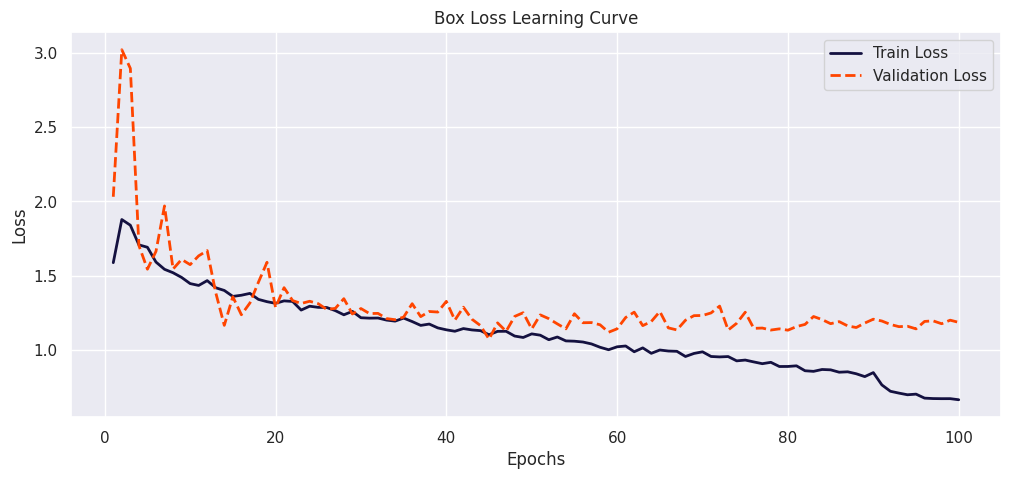

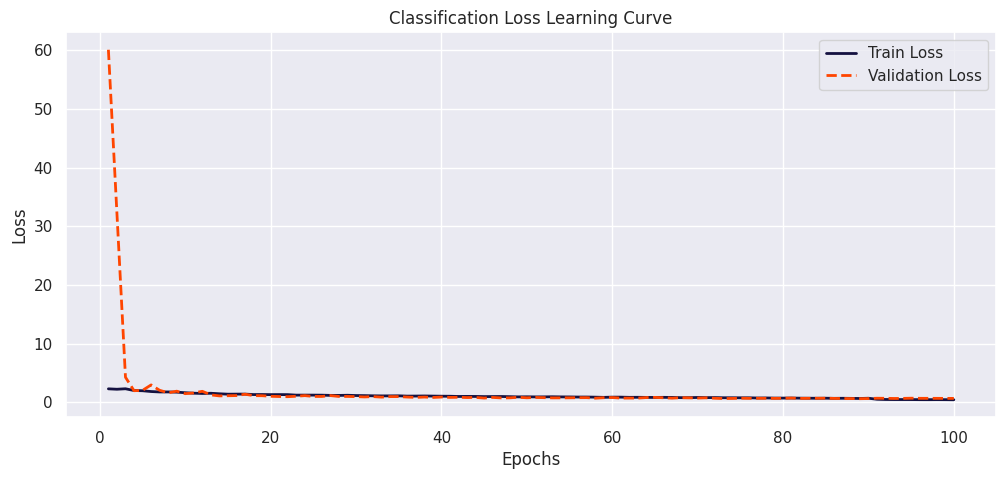

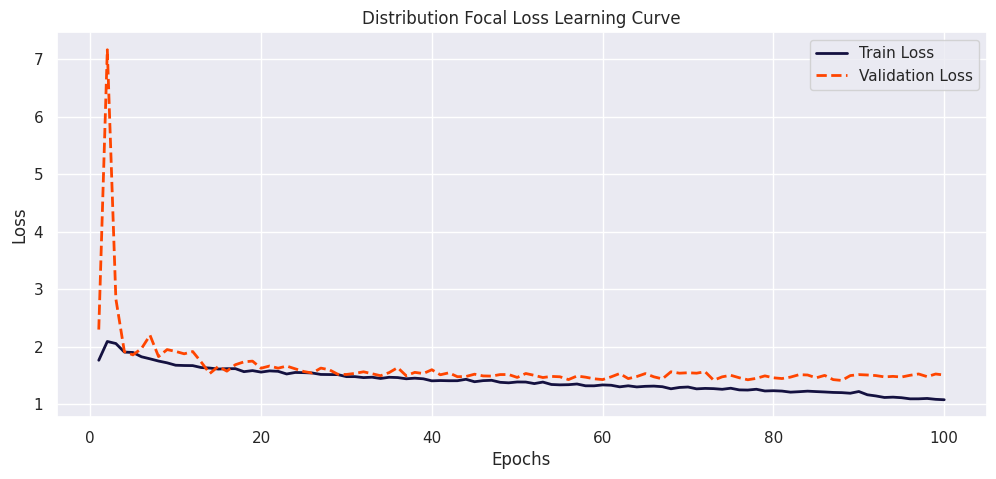

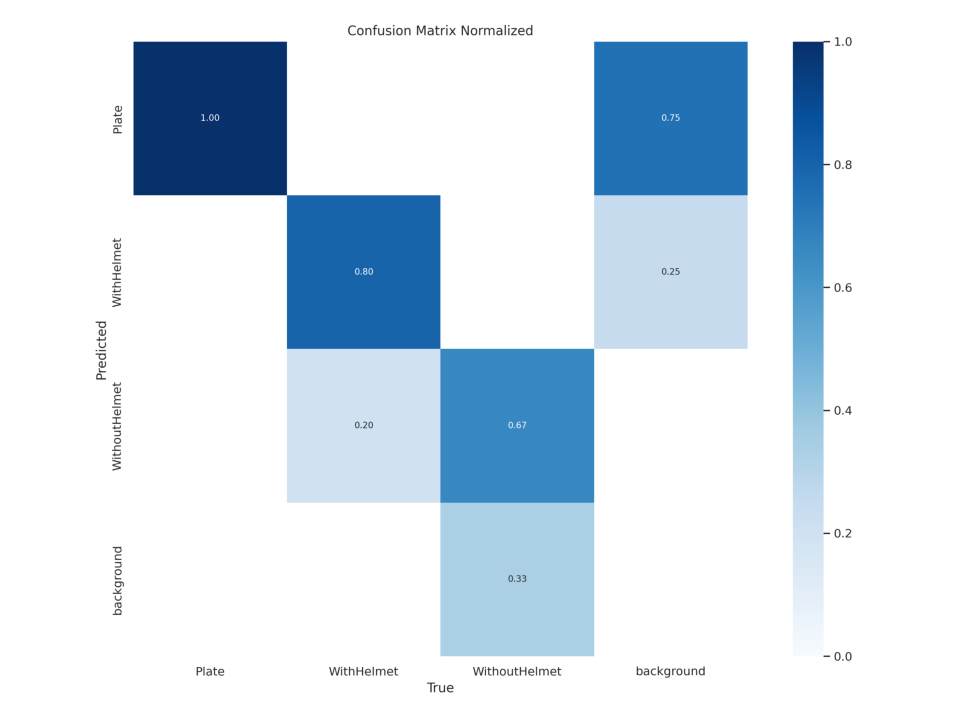

Ultralytics 8.3.47 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
YOLOv9e summary (fused): 687 layers, 57,378,713 parameters, 0 gradients, 189.1 GFLOPs


val: Scanning /kaggle/input/helmet/valid/labels... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<00:00, 755.80it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/helmet/valid is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.39s/it]


                   all         30         38      0.823      0.909       0.85      0.648
                 Plate         30         30      0.921          1      0.992      0.687
            WithHelmet          5          5      0.817        0.8      0.811      0.585
         WithoutHelmet          3          3      0.732      0.928      0.746      0.672
Speed: 0.3ms preprocess, 85.2ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/val2


,Metric Value
metrics/precision(B),0.823
metrics/recall(B),0.909
metrics/mAP50(B),0.850
metrics/mAP50-95(B),0.648
fitness,0.668


In [9]:

# Define a function to plot learning curves for loss values
def plot_learning_curve(df, train_loss_col, val_loss_col, title):
    
    plt.figure(figsize=(12, 5))
    sns.lineplot(data=df, x='epoch', y=train_loss_col, label='Train Loss', color='#141140', linestyle='-', linewidth=2)
    sns.lineplot(data=df, x='epoch', y=val_loss_col, label='Validation Loss', color='orangered', linestyle='--', linewidth=2)
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
# Create the full file path for 'results.csv' using the directory path and file name
results_csv_path = os.path.join(post_training_files_path, 'results.csv')

# Load the CSV file from the constructed path into a pandas DataFrame
df = pd.read_csv(results_csv_path)

# Remove any leading whitespace from the column names
df.columns = df.columns.str.strip()

# Plot the learning curves for each loss
plot_learning_curve(df, 'train/box_loss', 'val/box_loss', 'Box Loss Learning Curve')
plot_learning_curve(df, 'train/cls_loss', 'val/cls_loss', 'Classification Loss Learning Curve')
plot_learning_curve(df, 'train/dfl_loss', 'val/dfl_loss', 'Distribution Focal Loss Learning Curve')

# Construct the path to the normalized confusion matrix image
confusion_matrix_path = os.path.join(post_training_files_path, 'confusion_matrix_normalized.png')

# Read the image using cv2
cm_img = cv2.imread(confusion_matrix_path)

# Convert the image from BGR to RGB color space for accurate color representation with matplotlib
cm_img = cv2.cvtColor(cm_img, cv2.COLOR_BGR2RGB)

# Display the image
plt.figure(figsize=(10, 10), dpi=120)
plt.imshow(cm_img)
plt.axis('off') 
plt.show()
# Construct the path to the best model weights file using os.path.join
best_model_path = os.path.join(post_training_files_path, 'weights/best.pt')

# Load the best model weights into the YOLO model
best_model = YOLO(best_model_path )

# Validate the best model using the validation set with default parameters
metrics = best_model.val(split='val')
# Convert the dictionary to a pandas DataFrame and use the keys as the index
metrics_df = pd.DataFrame.from_dict(metrics.results_dict, orient='index', columns=['Metric Value'])

# Display the DataFram
metrics_df.round(3)


0: 640x640 1 Plate, 101.0ms
Speed: 4.1ms preprocess, 101.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Plate, 80.8ms
Speed: 3.3ms preprocess, 80.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 66.8ms
Speed: 2.2ms preprocess, 66.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Plate, 65.7ms
Speed: 5.2ms preprocess, 65.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Plate, 66.0ms
Speed: 2.2ms preprocess, 66.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Plates, 66.5ms
Speed: 4.3ms preprocess, 66.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Plate, 66.8ms
Speed: 2.1ms preprocess, 66.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


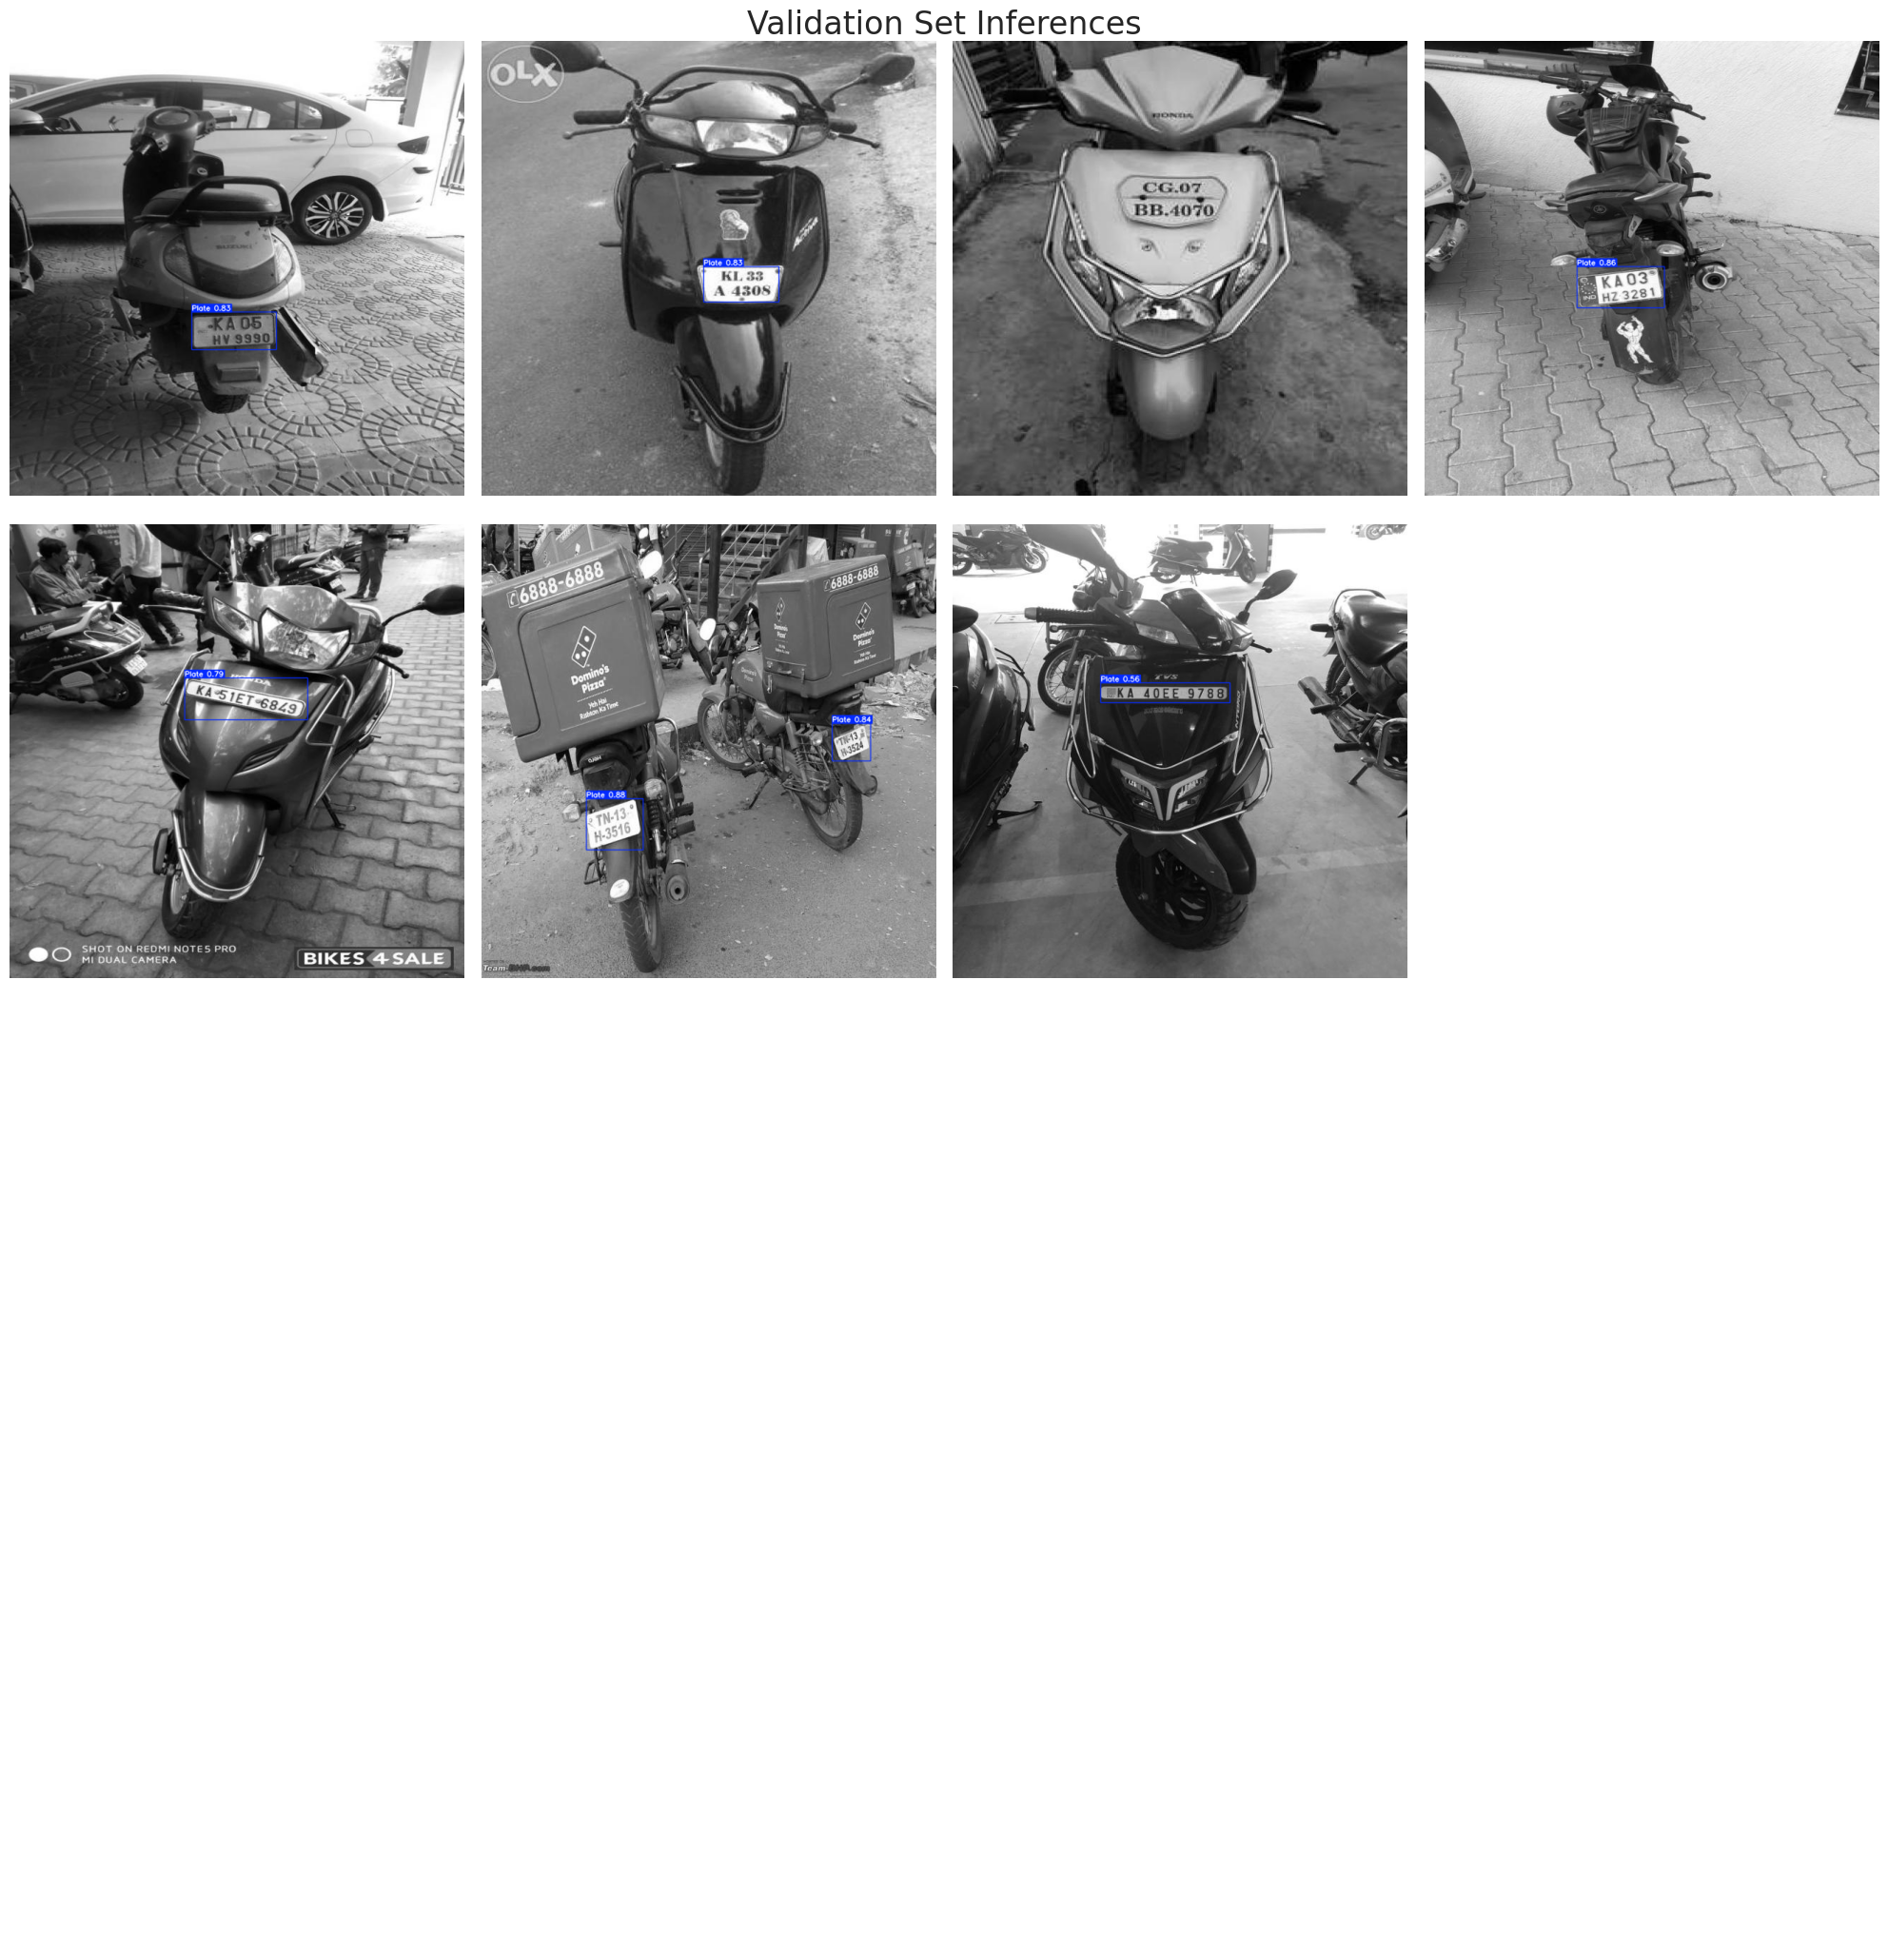

In [10]:
# Normalization function
def normalize_image(image):
    return image / 255.0

# Image resizing function
def resize_image(image, size=(640, 640)):
    return cv2.resize(image, size)

# Path to validation images
dataset_path = '/kaggle/input/helmet/'  # Place your dataset path here
valid_images_path = os.path.join(dataset_path, 'test', 'images')

# List of all jpg images in the directory
image_files = [file for file in os.listdir(valid_images_path) if file.endswith('.jpg')]

# Check if there are images in the directory
if len(image_files) > 0:
    # Select 9 images at equal intervals
    num_images = len(image_files)
    step_size = max(1, num_images // 15)  # Ensure the interval is at least 1
    selected_images = [image_files[i] for i in range(0, num_images, step_size)]

    # Prepare subplots
    fig, axes = plt.subplots(4, 4, figsize=(20, 21))
    fig.suptitle('Validation Set Inferences', fontsize=24)

    for i, ax in enumerate(axes.flatten()):
        if i < len(selected_images):
            image_path = os.path.join(valid_images_path, selected_images[i])
            
            # Load image
            image = cv2.imread(image_path)
            
            # Check if the image is loaded correctly
            if image is not None:
                # Resize image
                resized_image = resize_image(image, size=(640, 640))
                # Normalize image
                normalized_image = normalize_image(resized_image)
                
                # Convert the normalized image to uint8 data type
                normalized_image_uint8 = (normalized_image * 255).astype(np.uint8)
                
                # Predict with the model
                results = best_model.predict(source=normalized_image_uint8, imgsz=640, conf=0.5)
                
                # Plot image with labels
                annotated_image = results[0].plot(line_width=1)
                annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
                ax.imshow(annotated_image_rgb)
            else:
                print(f"Failed to load image {image_path}")
        ax.axis('off')

    plt.tight_layout()
    plt.show()



gfhg